# Introduction to Montecarlo Tree Search

In [1]:
import os
import numpy as np
import seaborn as sns
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import HTML
from gridworld import MCTSGridWrapper, dfs

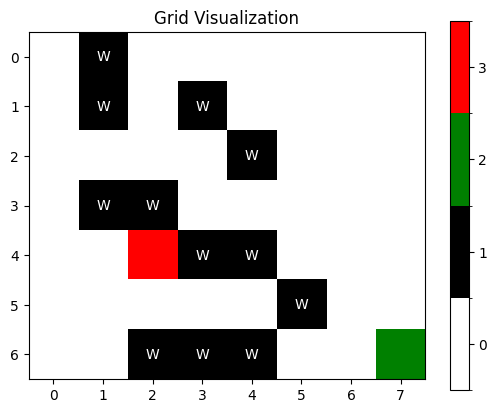

In [2]:
# 0: Possible paths  1: Obstacles  2: Starting position  3: End Position
grid = [
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 3, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 2],
]

arr = np.array(grid)
cmap = colors.ListedColormap(["white", "black", "green", "red"])
boundaries = [-0.5, 0.5, 1.5, 2.5, 3.5]
norm = colors.BoundaryNorm(boundaries, cmap.N)
plt.imshow(arr, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(ticks=[0, 1, 2, 3])
plt.title("Grid Visualization")

rows, cols = arr.shape
for i in range(rows):
    for j in range(cols):
        if arr[i, j] == 1:
            plt.text(j, i, 'W', ha='center', va='center', color='white')
            
plt.show()

In [3]:
iter_step = 100 
n_iter = 1000    # Total number of MCTS iterations
explore_low = 1.0  # Minimum exploration weight
explore_high = 3.0  # Maximum exploration weight
explore_n = 5     # Number of different exploration weights to test
explore_step = (explore_high - explore_low) / explore_n

all_results = []
exploration_weights = list(np.arange(explore_low, explore_high, explore_step))

for weight in exploration_weights:
    mcts = MCTSGridWrapper(grid, n_iterations=n_iter, exploration_weight=weight, save_interval=iter_step)
    results = mcts()
    all_results.append(results)

In [4]:
from mcts_animation import compare_exploration_weights

animation = compare_exploration_weights(all_results,
                                        grid,
                                        exploration_weights,
                                        animate=True)
display(animation)